# 1.1 Importing Packages

In [12]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from IPython.display import display


import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import feature_column
import seaborn as sns

# 1.2 Importing Data

In [13]:
path = Path.cwd() /"Data"/ "test.csv"
test_df = pd.read_csv(path, header=[0], skipinitialspace=True, index_col=0)

path = Path.cwd() /"Data"/ "train.csv"
train_df = pd.read_csv(path, header=[0], skipinitialspace=True, index_col=0)
train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set
display(train_df.head(3))


patient_race  payer_type patient_state  patient_zip3   Region  \
patient_id                                                                 
268700              NaN  COMMERCIAL            AR           724    South   
484983            White         NaN            IL           629  Midwest   
277055              NaN  COMMERCIAL            CA           925     West   

                      Division  patient_age patient_gender    bmi  \
patient_id                                                          
268700      West South Central           39              F    NaN   
484983      East North Central           55              F  35.36   
277055                 Pacific           59              F    NaN   

           breast_cancer_diagnosis_code  ... Average of Apr-18  \
patient_id                               ...                     
268700                           C50912  ...             52.55   
484983                           C50412  ...             49.30   
277055                             1749  ...             68.50   

           Average of May-18 Average of Jun-18 Average of Jul-18  \
patient_id                                                         
268700                 74.77             79.96             81.69   
484983                 72.87             77.40             77.43   
277055                 70.31             78.61             87.24   

            Average of Aug-18  Average of Sep-18  Average of Oct-18  \
patient_id                                                            
268700                  78.30              74.56              59.98   
484983                  75.83              72.64              58.36   
277055                  85.52              80.75              70.81   

            Average of Nov-18  Average of Dec-18  metastatic_diagnosis_period  
patient_id                                                                     
268700                  42.98              41.18                          191  
484983                  39.68              39.71                           33  
277055                  62.67              55.58                          157  

[3 rows x 151 columns]

In [14]:
test_df.head(3)

patient_race  payer_type patient_state  patient_zip3 Region  \
patient_id                                                               
730681              NaN  COMMERCIAL            LA           713  South   
334212            Black         NaN            NC           283  South   
571362              NaN  COMMERCIAL            TX           794  South   

                      Division  patient_age patient_gender    bmi  \
patient_id                                                          
730681      West South Central           55              F    NaN   
334212          South Atlantic           60              F  40.00   
571362      West South Central           54              F  32.33   

           breast_cancer_diagnosis_code  ... Average of Mar-18  \
patient_id                               ...                     
730681                             1746  ...             62.21   
334212                           C50912  ...             48.63   
571362                             1742  ...             57.82   

           Average of Apr-18 Average of May-18 Average of Jun-18  \
patient_id                                                         
730681                 62.23             78.34             81.96   
334212                 58.14             77.26             80.05   
571362                 59.95             77.79             82.45   

            Average of Jul-18  Average of Aug-18  Average of Sep-18  \
patient_id                                                            
730681                  83.58              82.22              80.20   
334212                  82.88              82.09              78.85   
571362                  82.44              80.77              72.16   

            Average of Oct-18  Average of Nov-18  Average of Dec-18  
patient_id                                                           
730681                  69.73              53.14              51.34  
334212                  64.60              50.57              48.10  
571362                  59.31              48.25              42.13  

[3 rows x 150 columns]

In [15]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13173 entries, 268700 to 379418
Columns: 151 entries, patient_race to metastatic_diagnosis_period
dtypes: float64(137), int64(3), object(11)
memory usage: 15.8+ MB
None


# 1.3 Descriptive Statistics

In [16]:
desc = pd.DataFrame(index = list(train_df))
desc['type'] = train_df.dtypes
desc['count'] = train_df.count()
desc['nunique'] = train_df.nunique()
desc['%unique'] = desc['nunique'] /len(train_df) *100
desc['null'] = train_df.isnull().sum()
desc['%null'] = desc['null']/ len(train_df) *100
desc = pd.concat([desc, train_df.describe().T.drop('count', axis = 1)], axis =1)
desc.sort_values(by = ['type', 'null']).style.background_gradient(axis=0)

This dataset has a mix of categorical and numerical predictor variables, which are important to distinguish since we need to encode categorical variables later.

In [17]:
# Categorical columns
cat_col = [col for col in train_df.columns if train_df[col].dtype == 'object']
print('Categorical columns :',cat_col)


Categorical columns : ['patient_race', 'payer_type', 'patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']


In [18]:
# Numerical columns
num_col = [col for col in train_df.columns if train_df[col].dtype != 'object']
print('Numerical columns :',num_col)

Numerical columns : ['patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_degree', 'labor_force_partic

In [19]:
len(num_col)

140

We have currently 140 predictor variables since one of the column is the target variable. 

In [39]:
#Initializing a variable that only has numerical columns and assigning it as x
numerical_variable = train_df[num_col]


patient_zip3  patient_age    bmi  population  density  age_median  \
268700         724.0         39.0  28.58     3924.87    82.63       42.58   
484983         629.0         55.0  35.36     2745.39    51.79       43.54   
277055         925.0         59.0  28.58    38343.18   700.34       36.28   
320055         900.0         59.0  28.58    36054.12  5294.33       36.65   
190386         934.0         71.0  28.58    13700.37   400.48       41.78   
...              ...          ...    ...         ...      ...         ...   
13168            NaN          NaN    NaN         NaN      NaN         NaN   
13169            NaN          NaN    NaN         NaN      NaN         NaN   
13170            NaN          NaN    NaN         NaN      NaN         NaN   
13171            NaN          NaN    NaN         NaN      NaN         NaN   
13172            NaN          NaN    NaN         NaN      NaN         NaN   

        age_under_10  age_10_to_19  age_20s  age_30s  ...  Average of Apr-18  \
268700         11.61         13.03    10.87    11.80  ...              52.55   
484983         11.22         12.19    11.45    11.01  ...              49.30   
277055         13.27         15.66    13.49    13.45  ...              68.50   
320055          9.76         11.27    17.23    17.44  ...              63.34   
190386         10.03         16.43    12.97    11.29  ...              59.45   
...              ...           ...      ...      ...  ...                ...   
13168            NaN           NaN      NaN      NaN  ...                NaN   
13169            NaN           NaN      NaN      NaN  ...                NaN   
13170            NaN           NaN      NaN      NaN  ...                NaN   
13171            NaN           NaN      NaN      NaN  ...                NaN   
13172            NaN           NaN      NaN      NaN  ...                NaN   

        Average of May-18  Average of Jun-18  Average of Jul-18  \
268700              74.77              79.96              81.69   
484983              72.87              77.40              77.43   
277055              70.31              78.61              87.24   
320055              63.10              67.45              75.86   
190386              60.24              64.77              69.81   
...                   ...                ...                ...   
13168                 NaN                NaN                NaN   
13169                 NaN                NaN                NaN   
13170                 NaN                NaN                NaN   
13171                 NaN                NaN                NaN   
13172                 NaN                NaN                NaN   

        Average of Aug-18  Average of Sep-18  Average of Oct-18  \
268700              78.30              74.56              59.98   
484983              75.83              72.64              58.36   
277055              85.52              80.75              70.81   
320055              75.24              71.10              68.95   
190386              70.13              68.10              65.38   
...                   ...                ...                ...   
13168                 NaN                NaN                NaN   
13169                 NaN                NaN                NaN   
13170                 NaN                NaN                NaN   
13171                 NaN                NaN                NaN   
13172                 NaN                NaN                NaN   

        Average of Nov-18  Average of Dec-18  metastatic_diagnosis_period  
268700              42.98              41.18                        191.0  
484983              39.68              39.71                         33.0  
277055              62.67              55.58                        157.0  
320055              65.46              59.46                        146.0  
190386              60.72              54.08                        286.0  
...                   ...                ...            

## 1.3.1 Distribution of Numerical Variables

In [21]:
fig, ax = plt.subplots(40,4, figsize = (30,40), dpi =300)
ax = ax.flatten()
for i, col in enumerate(num_col):
    sns.kdeplot(train_df[col], ax = ax[i], color = 'b')
    sns.kdeplot(test_df[col], ax = ax[i], color = 'g')
    ax[i].set_title(f'{col}')
    ax[i].set_xlabel(None)
    
    
for j in range(len(num_col), len(ax)):
    ax[j].axis('off')
fig.suptitle('Distribution of Feature')
#plt.tight_layout(h_pad = 1.0, w_pad = 0.5)
plt.subplots_adjust(left = 0.05, right = 0.95, top =0.95, bottom = 0.05, hspace = 0.4, wspace = 0.3)
plt.show()

KeyError: 'metastatic_diagnosis_period'

# 1.4 Handle Missing Values

In [22]:
#of missing data: 
train_df.isnull().sum().sum()


44929

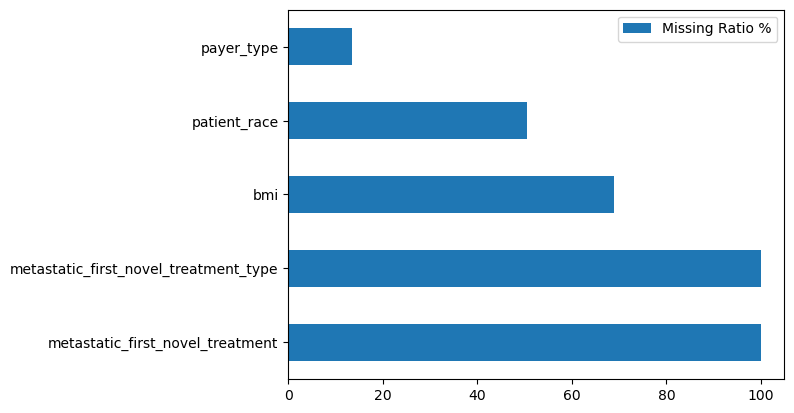

In [23]:
# plot the columns that have the most missing values
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data_more_than_20_percent = missing_data[missing_data['Missing Ratio %'] > 10.0]
        missing_data_more_than_20_percent.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

plot_nas(train_df)

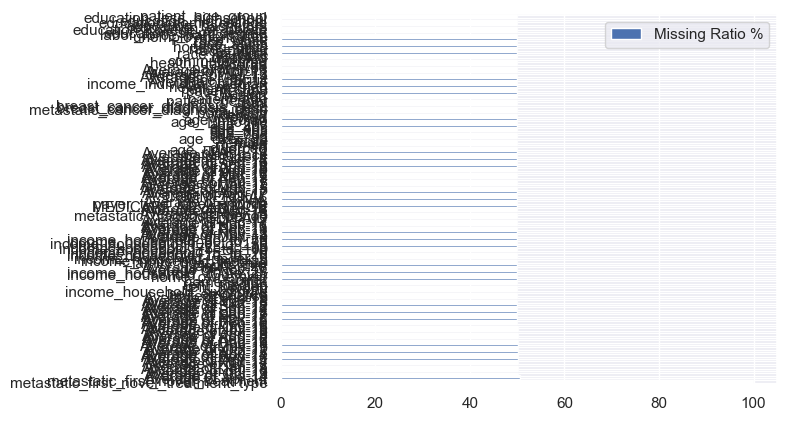

In [71]:
# fill in empty value in the "patient_race" column with "N/A"
train_df["patient_race"].fillna(np.nan, inplace=True)

# fill in empty value in the "patient_race" column with "N/A"
train_df["payer_type"].fillna(np.nan, inplace=True)


We will fill in BMI with the median. 

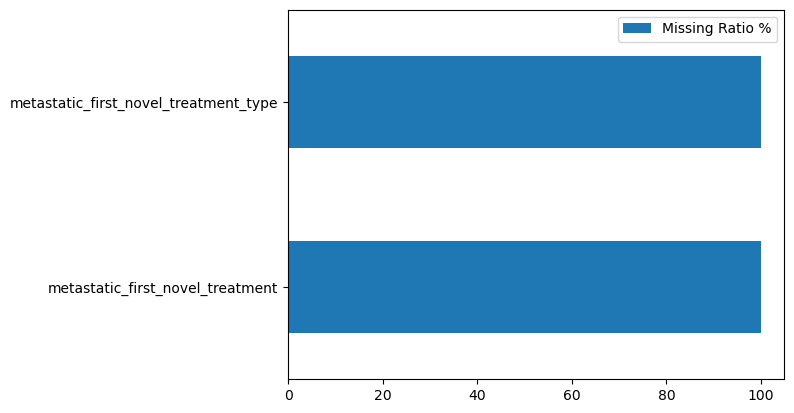

In [25]:
train_df['bmi'].fillna(train_df['bmi'].median(), inplace=True)
plot_nas(train_df)

In [ ]:

#Drop metastatic_first_novel_treatment type and metastatic_first_novel_treatment since we are missing 99% of the data in these categories.
#train_df2 = train_df.drop(['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'])
#train_df = train_df.drop(['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'], axis=1, inplace=True)


I actually cannot just drop these columns for some reason because I lose a lot of rows and eventually my predictor observation number and target observation number don't match. 

I need to keep these two columns. 
But HOW? 


In [ ]:
#Initializing a variable that only has numerical columns 
numerical_variablble = train_df[num_col]


In [ ]:
len(num_col)

# 1.5 Outliers


# 1.6 Target

/var/folders/m0/f2ywpq8966s247w9qktrvsrh0000gn/T/ipykernel_73323/3766997799.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero_days['metastatic_diagnosis_period'], color ='b')


<Axes: xlabel='metastatic_diagnosis_period', ylabel='Density'>

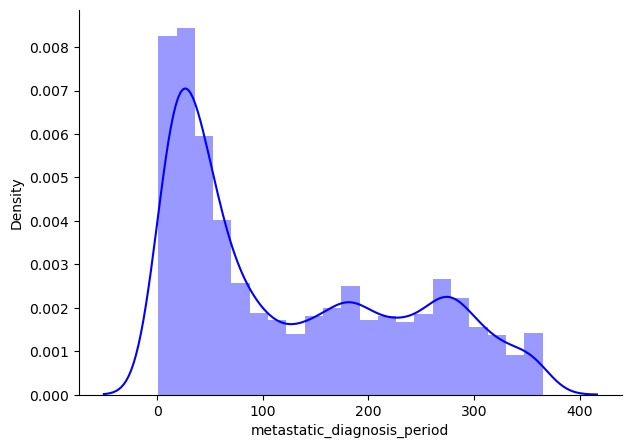

In [26]:
f, ax = plt.subplots(figsize = (7,5))
sns.despine(f)
zero_days = train_df[train_df['metastatic_diagnosis_period'] >0]
zero_days.head(3)
sns.distplot(zero_days['metastatic_diagnosis_period'], color ='b')
#sns.kdeplot(train_df[train_df['metastatic_diagnosis_period']>0], fill = True, color = 'b')
#sns.kdeplot(test_df['metastatic_diagnosis_period'], fill =True, color = 'r')
#plt.show()


In [27]:
no_meta = train_df[train_df['metastatic_diagnosis_period'] == 0]
no_meta.describe()

patient_zip3  patient_age          bmi    population       density  \
count   3126.000000  3126.000000  3126.000000   3126.000000   3126.000000   
mean     602.098528    59.388676    28.822022  21521.570822   1811.744709   
std      279.286546    14.552644     3.124056  13420.477013   3717.354325   
min      100.000000    18.000000    17.000000    635.550000      1.170000   
25%      347.000000    51.000000    28.580000  10228.120000    202.640000   
50%      606.000000    59.000000    28.580000  20161.320000    782.650000   
75%      900.000000    67.750000    28.580000  30701.430000   1836.730000   
max      995.000000    91.000000    90.000000  71374.130000  29851.690000   

        age_median  age_under_10  age_10_to_19      age_20s      age_30s  ...  \
count  3126.000000   3126.000000   3126.000000  3126.000000  3126.000000  ...   
mean     40.288653     11.078426     12.812949    13.535006    13.119344  ...   
std       3.984886      1.506682      1.981889     3.414560     2.461037  ...   
min      20.600000      0.000000      6.310000     5.930000     1.500000  ...   
25%      36.902500     10.130000     11.520000    11.200000    11.330000  ...   
50%      40.290000     11.000000     12.870000    12.730000    12.550000  ...   
75%      42.870000     12.100000     13.930000    15.520000    14.450000  ...   
max      53.760000     16.480000     35.300000    62.100000    25.470000  ...   

       Average of Apr-18  Average of May-18  Average of Jun-18  \
count        3126.000000        3126.000000        3125.000000   
mean           53.335371          67.598020          72.848342   
std            11.019340           6.337195           6.499245   
min            29.240000          45.880000          53.460000   
25%            45.040000          63.100000          67.950000   
50%            52.115000          65.880000          71.510000   
75%            63.250000          72.530000          77.560000   
max            76.490000          86.570000          90.050000   

       Average of Jul-18  Average of Aug-18  Average of Sep-18  \
count        3119.000000        3124.000000        3125.000000   
mean           77.178362          76.208806          71.445549   
std             5.252995           5.210181           6.355883   
min            58.540000          56.200000          51.830000   
25%            73.520000          72.550000          67.370000   
50%            76.610000          75.890000          71.050000   
75%            80.500000          79.050000          75.260000   
max            95.300000          94.040000          88.680000   

       Average of Oct-18  Average of Nov-18  Average of Dec-18  \
count        3125.000000        3125.000000        3120.000000   
mean           60.013347          47.557472          43.303635   
std             9.440936          12.763411          11.685424   
min            38.060000          20.200000          17.800000   
25%            52.070000          36.550000          33.810000   
50%            59.600000          44.130000          41.000000   
75%            68.640000          57.980000          53.402500   
max            81.460000          76.300000          73.540000   

       metastatic_diagnosis_period  
count                       3126.0  
mean                           0.0  
std                            0.0  
min                            0.0  
25%                            0.0  
50%                            0.0  
75%                            0.0  
max                            0.0  

[8 rows x 140 columns]

In [28]:
len(no_meta) / len(train_df)

0.23730357549533135

3126 patients have 0 metastatic diagnosis period which means they found out they got metastiatic diagnosis on the day they found out they had breast cancer, which is about 23.7% of the patients.  

# 1.7 Data Transformation 

Labeling where 0, 1, and 2 will be encoded as "commercial", "medicaid", and "medical advantage".

In [29]:
le1 = preprocessing.LabelEncoder()
train_df['payer_type_label_encode'] =le1.fit_transform(train_df['payer_type'])
display(train_df)

patient_race  payer_type patient_state  patient_zip3     Region  \
patient_id                                                                   
268700              N/A  COMMERCIAL            AR           724      South   
484983            White         N/A            IL           629    Midwest   
277055              N/A  COMMERCIAL            CA           925       West   
320055         Hispanic    MEDICAID            CA           900       West   
190386              N/A  COMMERCIAL            CA           934       West   
...                 ...         ...           ...           ...        ...   
588544         Hispanic    MEDICAID            PA           191  Northeast   
393047              N/A  COMMERCIAL            TX           757      South   
790904              N/A  COMMERCIAL            CA           928       West   
455518              N/A  COMMERCIAL            MI           481    Midwest   
379418         Hispanic    MEDICAID            CA           900       West   

                      Division  patient_age patient_gender    bmi  \
patient_id                                                          
268700      West South Central           39              F  28.58   
484983      East North Central           55              F  35.36   
277055                 Pacific           59              F  28.58   
320055                 Pacific           59              F  28.58   
190386                 Pacific           71              F  28.58   
...                        ...          ...            ...    ...   
588544         Middle Atlantic           59              F  28.58   
393047      West South Central           73              F  30.67   
790904                 Pacific           19              F  28.58   
455518      East North Central           52              F  28.58   
379418                 Pacific           63              F  28.58   

           breast_cancer_diagnosis_code  ... Average of May-18  \
patient_id                               ...                     
268700                           C50912  ...             74.77   
484983                           C50412  ...             72.87   
277055                             1749  ...             70.31   
320055                           C50911  ...             63.10   
190386                             1748  ...             60.24   
...                                 ...  ...               ...   
588544                           C50911  ...             66.12   
393047                             1749  ...             77.82   
790904                           C50819  ...             66.04   
455518                             1742  ...             63.56   
379418                           C50911  ...             63.10   

           Average of Jun-18 Average of Jul-18 Average of Aug-18  \
patient_id                                                         
268700                 79.96             81.69             78.30   
484983                 77.40             77.43             75.83   
277055                 78.61             87.24             85.52   
320055                 67.45             75.86             75.24   
190386                 64.77             69.81             70.13   
...                      ...               ...               ...   
588544                 70.38             77.18             77.53   
393047                 84.52             85.35             84.61   
790904                 70.87             80.68             79.75   
455518                 68.68             72.13             72.55   
379418                 67.45             75.86             75.24   

            Average of Sep-18  Average of Oct-18  Average of Nov-18  \
patient_id                                                            
268700                  74.56              59.98              42.98   
484983                  72.64              58.36              39.68   
277055                  80.75              70.81              62.67   

Now we will do one-hot encoding. 

In [30]:
#One-hot Encoding of Payer Type

#Get the categorical values
one_hot_encoder = LabelBinarizer()
one_hot_encoder.fit(train_df['payer_type'])
print(one_hot_encoder.classes_)

#Transform our payer_type column to 4 different binary columns corresponding to different categories
transformed = pd.DataFrame(one_hot_encoder.transform(train_df['payer_type']),columns=one_hot_encoder.classes_)
#Combine with original data frame
train_df = pd.concat([train_df,transformed], axis = 1)
display(train_df)

['COMMERCIAL' 'MEDICAID' 'MEDICARE ADVANTAGE' 'N/A']


patient_race  payer_type patient_state  patient_zip3   Region  \
268700          N/A  COMMERCIAL            AR         724.0    South   
484983        White         N/A            IL         629.0  Midwest   
277055          N/A  COMMERCIAL            CA         925.0     West   
320055     Hispanic    MEDICAID            CA         900.0     West   
190386          N/A  COMMERCIAL            CA         934.0     West   
...             ...         ...           ...           ...      ...   
13168           NaN         NaN           NaN           NaN      NaN   
13169           NaN         NaN           NaN           NaN      NaN   
13170           NaN         NaN           NaN           NaN      NaN   
13171           NaN         NaN           NaN           NaN      NaN   
13172           NaN         NaN           NaN           NaN      NaN   

                  Division  patient_age patient_gender    bmi  \
268700  West South Central         39.0              F  28.58   
484983  East North Central         55.0              F  35.36   
277055             Pacific         59.0              F  28.58   
320055             Pacific         59.0              F  28.58   
190386             Pacific         71.0              F  28.58   
...                    ...          ...            ...    ...   
13168                  NaN          NaN            NaN    NaN   
13169                  NaN          NaN            NaN    NaN   
13170                  NaN          NaN            NaN    NaN   
13171                  NaN          NaN            NaN    NaN   
13172                  NaN          NaN            NaN    NaN   

       breast_cancer_diagnosis_code  ... Average of Sep-18 Average of Oct-18  \
268700                       C50912  ...             74.56             59.98   
484983                       C50412  ...             72.64             58.36   
277055                         1749  ...             80.75             70.81   
320055                       C50911  ...             71.10             68.95   
190386                         1748  ...             68.10             65.38   
...                             ...  ...               ...               ...   
13168                           NaN  ...               NaN               NaN   
13169                           NaN  ...               NaN               NaN   
13170                           NaN  ...               NaN               NaN   
13171                           NaN  ...               NaN               NaN   
13172                           NaN  ...               NaN               NaN   

       Average of Nov-18 Average of Dec-18  metastatic_diagnosis_period  \
268700             42.98             41.18                        191.0   
484983             39.68             39.71                         33.0   
277055             62.67             55.58                        157.0   
320055             65.46             59.46                        146.0   
190386             60.72             54.08                        286.0   
...                  ...               ...                          ...   
13168                NaN               NaN                          NaN   
13169                NaN               NaN                          NaN   
13170                NaN               NaN                          NaN   
13171                NaN               NaN                          NaN   
13172                NaN               NaN                          NaN   

        payer_type_label_encode  COMMERCIAL  MEDICAID  MEDICARE ADVANTAGE  N/A  
268700                      0.0         NaN       NaN                 NaN  NaN  
484983                      3.0         NaN       NaN                 NaN  NaN  
277055                      0.0         NaN       NaN                 NaN  NaN  
320055                      1.0         NaN       NaN                 NaN  NaN  
190386                      0.0         NaN       NaN                 NaN  NaN  
...          

In [31]:
#One-hot Encoding of Patient Race
one_hot_encoder = LabelBinarizer()
one_hot_encoder.fit(train_df['patient_race'])
print(one_hot_encoder.classes_)

TypeError: '<' not supported between instances of 'float' and 'str'

In [32]:
#Patience Race -> One-Hot Coding
transformed = pd.DataFrame(one_hot_encoder.transform(train_df['patient_race']),columns=one_hot_encoder.classes_)
#Combine with original data frame
train_df = pd.concat([train_df,transformed], axis = 1)
display(train_df)

NotFittedError: This LabelBinarizer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [33]:
#Categorizing Age Group
bins= [0,2,4,13,20,70,100]
labels = ['Infant','Toddler','Kid','Teen','Adult',"Old Adult"]
train_df['patient_age_group'] = pd.cut(train_df['patient_age'], bins=bins, labels=labels, right=False)
display (train_df)

patient_race  payer_type patient_state  patient_zip3   Region  \
268700          N/A  COMMERCIAL            AR         724.0    South   
484983        White         N/A            IL         629.0  Midwest   
277055          N/A  COMMERCIAL            CA         925.0     West   
320055     Hispanic    MEDICAID            CA         900.0     West   
190386          N/A  COMMERCIAL            CA         934.0     West   
...             ...         ...           ...           ...      ...   
13168           NaN         NaN           NaN           NaN      NaN   
13169           NaN         NaN           NaN           NaN      NaN   
13170           NaN         NaN           NaN           NaN      NaN   
13171           NaN         NaN           NaN           NaN      NaN   
13172           NaN         NaN           NaN           NaN      NaN   

                  Division  patient_age patient_gender    bmi  \
268700  West South Central         39.0              F  28.58   
484983  East North Central         55.0              F  35.36   
277055             Pacific         59.0              F  28.58   
320055             Pacific         59.0              F  28.58   
190386             Pacific         71.0              F  28.58   
...                    ...          ...            ...    ...   
13168                  NaN          NaN            NaN    NaN   
13169                  NaN          NaN            NaN    NaN   
13170                  NaN          NaN            NaN    NaN   
13171                  NaN          NaN            NaN    NaN   
13172                  NaN          NaN            NaN    NaN   

       breast_cancer_diagnosis_code  ... Average of Oct-18 Average of Nov-18  \
268700                       C50912  ...             59.98             42.98   
484983                       C50412  ...             58.36             39.68   
277055                         1749  ...             70.81             62.67   
320055                       C50911  ...             68.95             65.46   
190386                         1748  ...             65.38             60.72   
...                             ...  ...               ...               ...   
13168                           NaN  ...               NaN               NaN   
13169                           NaN  ...               NaN               NaN   
13170                           NaN  ...               NaN               NaN   
13171                           NaN  ...               NaN               NaN   
13172                           NaN  ...               NaN               NaN   

       Average of Dec-18 metastatic_diagnosis_period  payer_type_label_encode  \
268700             41.18                       191.0                      0.0   
484983             39.71                        33.0                      3.0   
277055             55.58                       157.0                      0.0   
320055             59.46                       146.0                      1.0   
190386             54.08                       286.0                      0.0   
...                  ...                         ...                      ...   
13168                NaN                         NaN                      NaN   
13169                NaN                         NaN                      NaN   
13170                NaN                         NaN                      NaN   
13171                NaN                         NaN                      NaN   
13172                NaN                         NaN                      NaN   

        COMMERCIAL  MEDICAID  MEDICARE ADVANTAGE  N/A  patient_age_group  
268700         NaN       NaN                 NaN  NaN              Adult  
484983         NaN       NaN                 NaN  NaN              Adult  
277055         NaN       NaN                 NaN  NaN              Adult  
320055         NaN       NaN                 NaN  NaN              Adult  
190386         NaN       NaN                 NaN  Na

In [ ]:
display(train_df["home_value"])

In [35]:
#Min- Max Scaling (to have number between 0 and 1)
def min_max_scaling(df, column_name):
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    df[column_name] = (df[column_name] - min_value) / (max_value - min_value)

# Apply min-max scaling to 'Salary' column
min_max_scaling(train_df, 'home_value')

# Print the DataFrame after min-max scaling
print("DataFrame after Min-Max Scaling:")
display(train_df["home_value"])


DataFrame after Min-Max Scaling:


268700    0.014926
484983    0.017516
277055    0.185202
320055    0.453632
190386    0.302574
            ...   
13168          NaN
13169          NaN
13170          NaN
13171          NaN
13172          NaN
Name: home_value, Length: 26346, dtype: float64

# 2.1 EDA

In [40]:
#Select only the numerical columns
numerical_df = numerical_variable.select_dtypes(include=['float64', 'int64'])
#30 columns are numerical columns
corr_matrix = round(numerical_df.corr(),2)
print(corr_matrix)

                             patient_zip3  patient_age   bmi  population  \
patient_zip3                         1.00        -0.07 -0.03        0.08   
patient_age                         -0.07         1.00 -0.04       -0.02   
bmi                                 -0.03        -0.04  1.00       -0.03   
population                           0.08        -0.02 -0.03        1.00   
density                             -0.25         0.01 -0.03        0.62   
...                                   ...          ...   ...         ...   
Average of Sep-18                    0.01        -0.07  0.03        0.21   
Average of Oct-18                    0.24        -0.08  0.00        0.31   
Average of Nov-18                    0.38        -0.07 -0.02        0.38   
Average of Dec-18                    0.34        -0.07 -0.01        0.36   
metastatic_diagnosis_period         -0.03        -0.06 -0.01        0.01   

                             density  age_median  age_under_10  age_10_to_19  \
patient

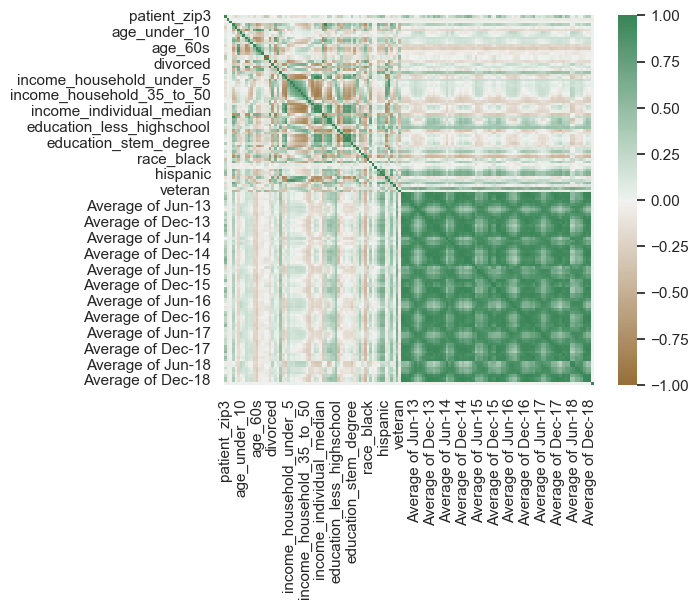

In [41]:
#Heat Matrix 
axis_corr = sns.heatmap(
corr_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

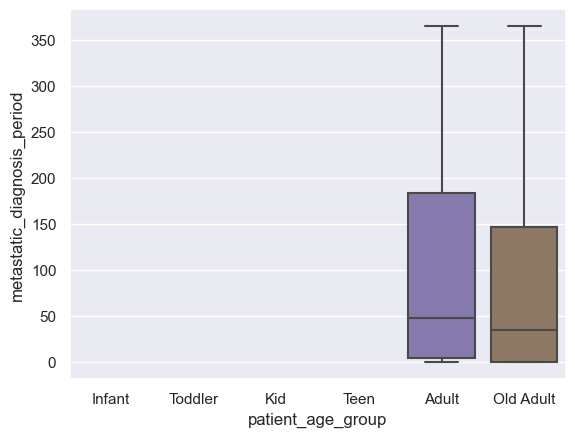

In [42]:
sns.boxplot(x='patient_age_group', y='metastatic_diagnosis_period', 
            data=train_df[train_df['patient_age_group'].isin(['Adult', 'Old Adult'])])
plt.show()

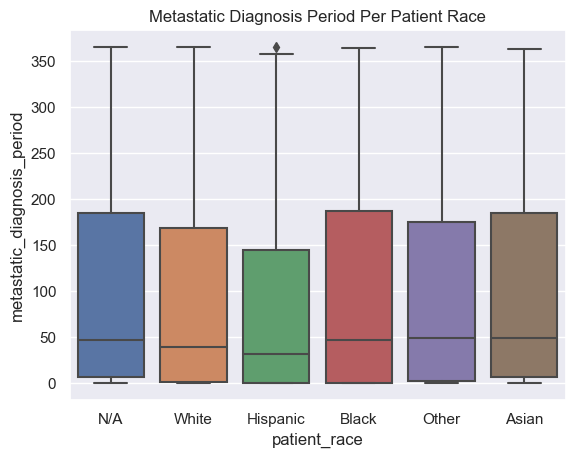

In [59]:
sns.boxplot(x='patient_race', y='metastatic_diagnosis_period', 
            data=train_df).set_title("Metastatic Diagnosis Period Per Patient Race")
plt.show()

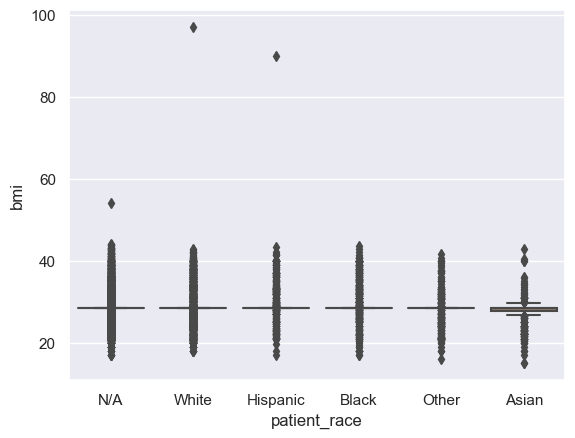

In [44]:
sns.boxplot(x='patient_race', y='bmi', 
            data=train_df)
plt.show()

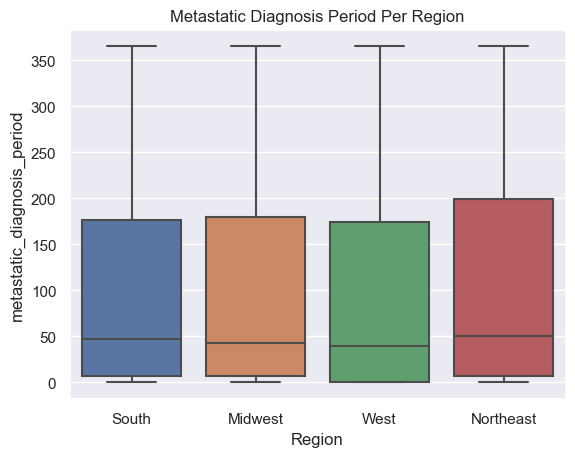

In [58]:
sns.boxplot(x='Region', y='metastatic_diagnosis_period', data=train_df).set_title("Metastatic Diagnosis Period Per Region")
plt.show()

AttributeError: 'Text' object has no attribute 'set_xticklabels'

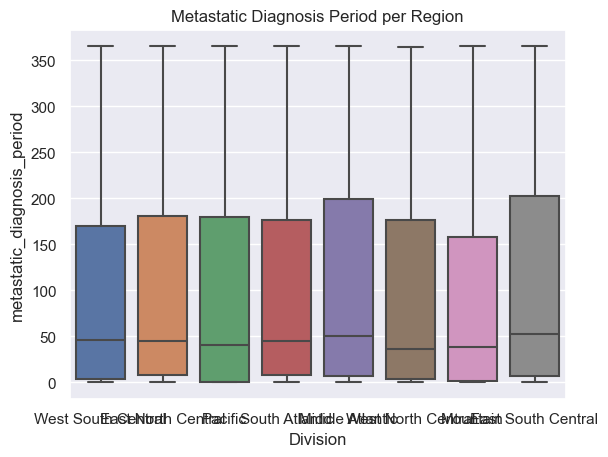

In [57]:
division_boxplot= sns.boxplot(x='Division', y='metastatic_diagnosis_period', data=train_df).set_title("Metastatic Diagnosis Period per Region")
division_boxplot.set_xticklabels(division_boxplot.get_xticklabels(), rotation=45)
plt.show()

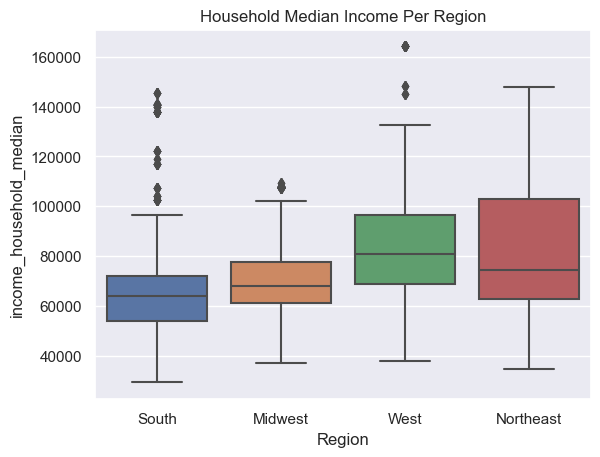

In [56]:
sns.boxplot(x='Region', y='income_household_median', data=train_df).set_title("Household Median Income Per Region")
plt.show()

<Axes: title={'center': 'Types of Payers'}, xlabel='payer_type'>

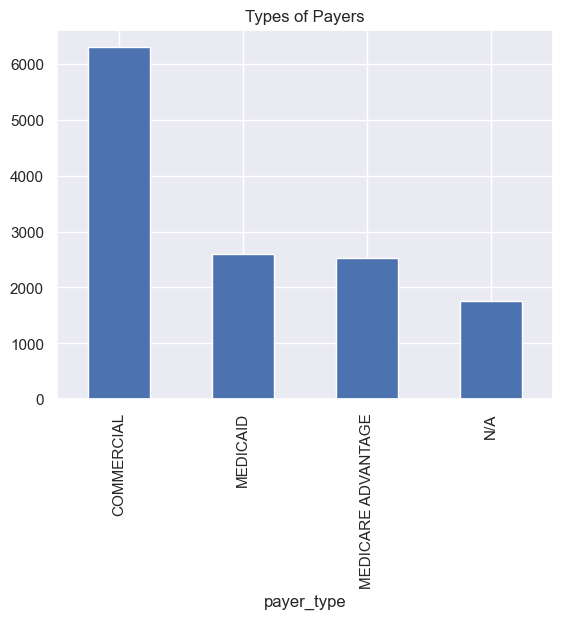

In [51]:
train_df['payer_type'].value_counts().plot(kind='bar', title = "Types of Payers")


<Axes: title={'center': 'Patient Race'}, xlabel='patient_race'>

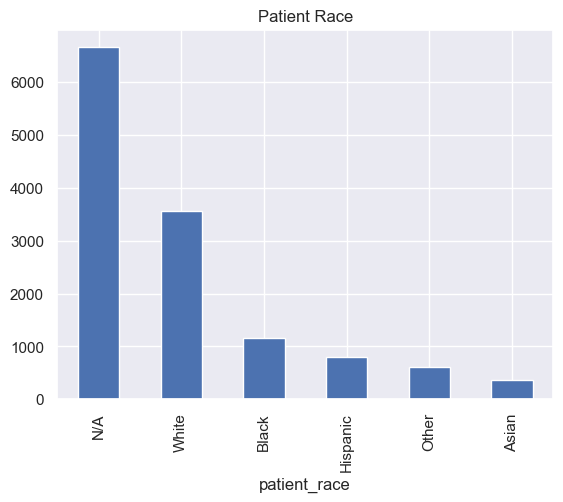

In [50]:
train_df['patient_race'].value_counts().plot(kind='bar', title = "Patient Race")


In [ ]:
train_df['Region'].value_counts().plot(kind='bar')

In [ ]:
train_df['Division'].value_counts().plot(kind='bar')

<Axes: xlabel='patient_race'>

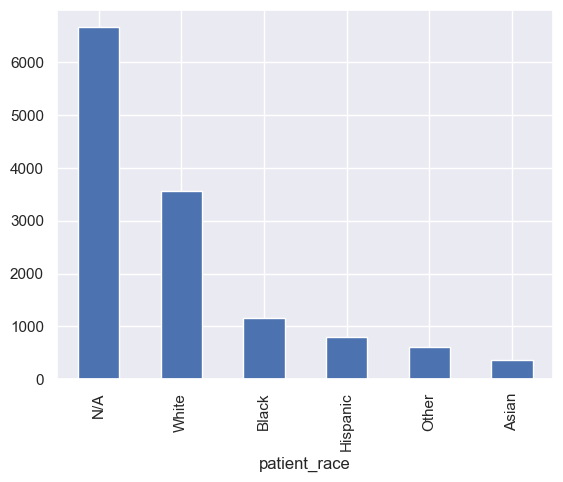

In [73]:
train_df['patient_race'].value_counts().plot(kind='bar')

In [ ]:
train_df['patient_state'].value_counts().plot(kind='bar')

In [ ]:
# plot correlation between categorical values vs. numerical values
train_df.groupby(['patient_race'])["bmi"].mean().plot(kind='bar')

In [ ]:
train_df.groupby(['patient_race'])["bmi"].describe()

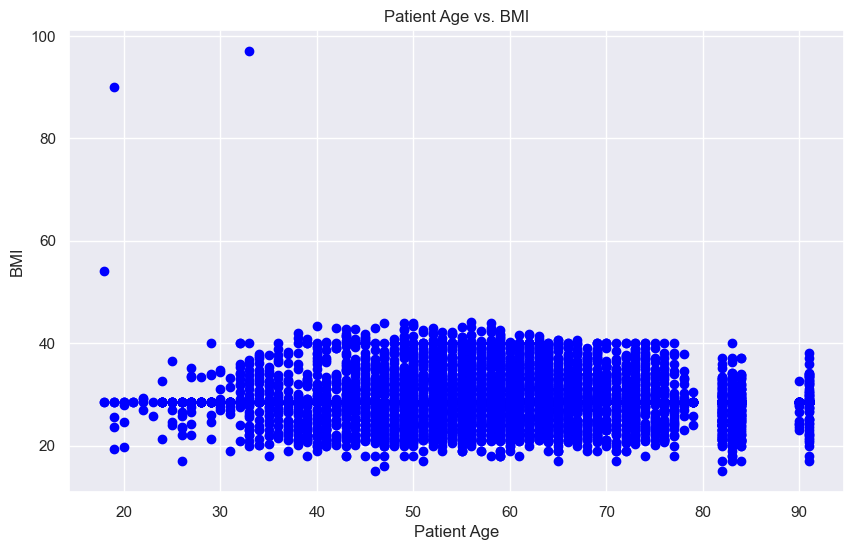

In [72]:
#train_df.groupby('patient_race')

plt.figure(figsize = (10,6))
plt.scatter(train_df['patient_age'], train_df['bmi'], color = 'blue')#.groupby('patient_race')
plt.title('Patient Age vs. BMI')
plt.xlabel('Patient Age')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

In [ ]:
train_df['bmi'].describe()

In [ ]:
# plot correlation between categorical values vs. numerical values
train_df.groupby(['patient_race'])["bmi"].mean().plot(kind='bar')

In [ ]:
# plot correlation between categorical values vs. categorical values
pd.crosstab(train_df['patient_race'],train_df['payer_type']).plot(kind="bar",stacked=True)

In [ ]:
pd.crosstab(train_df['Region'],train_df['patient_race']).plot(kind="bar",stacked=True)

In [ ]:
pd.crosstab(train_df['Division'],train_df['patient_race']).plot(kind="bar",stacked=True)

In [ ]:
# plot correlation between categorical values vs. categorical values
pd.crosstab(train_df['patient_race'],train_df['patient_age_group']).plot(kind="bar",stacked=True)

In [ ]:
train_df.hist("patient_age")

Text(0.5, 1.0, 'Income vs. Meta Diagnosis Period')

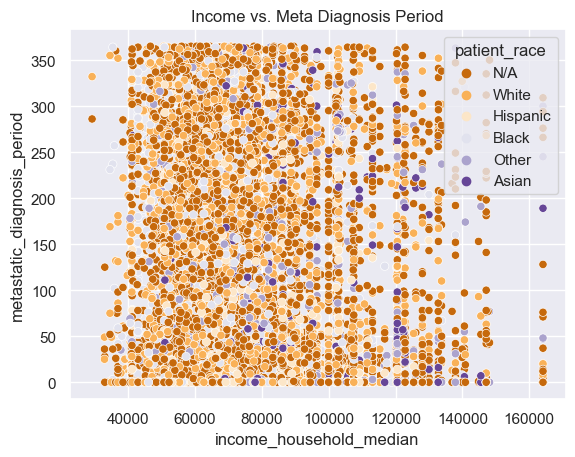

In [34]:
#Wealth vs. Metastatic Diagnosis Period 
sns.set()

#plt.plot(train_df['metastatic_diagnosis_period'], train_df['income_household_median'])

sns.scatterplot(x='income_household_median', y='metastatic_diagnosis_period', hue= 'patient_race', palette='PuOr', data = train_df)
plt.title('Income vs. Meta Diagnosis Period')


In [ ]:
sns.regplot(x='income_household_median', y='metastatic_diagnosis_period', data=train_df)
plt.title('Meidan Household Income vs. Metastatic Diagnosis Period')

In [ ]:
pd.options.display.max_columns = None
train_df.describe()

In [ ]:
train_df['metastatic_diagnosis_period'].describe()


# 3.1 Modeling

## 3.1.1 Gradient Boosting Regression

Creating x (predictor) variables and y (target) variables based on our training data

In [70]:
x = numerical_variable
y = train_df['metastatic_diagnosis_period']

len(x), len(y)


26346

Split the data into training and testing dataset based on the train_df
We will assign 80% of the train_df data as a training data.

In [61]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =0, train_size = 0.8) 

len(x_train), len(x_test)

(21076, 5270)

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # Optional for versions >= 0.24
from sklearn.ensemble import HistGradientBoostingRegressor

parameters = {'max_iter': 100, 'max_depth': 3, 'learning_rate': 0.1}
gradient_boosting_regressor_model = HistGradientBoostingRegressor(**parameters)
gradient_boosting_regressor_model.fit(x_train, y_train)

ValueError: Input y contains NaN.

In [63]:
#Initialize and train the Graidnet Boosting Regression Model 
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate = 0.1, max_depth=3, random_state=42)
gb_regressor.fit(x_train, y_train)

ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values